This script looks at employment data from the 2011 census. The data is organised by output area, OA. In this script, the OAs are amalgamated into lower super output areas, LSOAs, which are larger areas of appoximately 1500 people. The lsoa_to_oa_dict is a dictionary that takes in the OA code for any OA and returns the LSOA code of the LSOA that OA is in. 

In [1]:
import pandas as pd 
import numpy as np

This dictionaries map OAs to their LSOAs and vice versa. 

In [2]:
oa_to_lsoa_dict = np.load('oa_to_lsoa_dict.npy').item(0)
lsoa_to_oa_dict = np.load('lsoa_to_oa_dict.npy').item(0)

These are the LSOA codes we are interested in (the areas where SRCDC operates). Note that south Grangetown and North Riverside are nearby areas, but not areas that SRCDC operates in.

In [3]:
grangetown_codes = ['W01001759','W01001760','W01001761','W01001762','W01001764','W01001765',\
                    'W01001766','W01001767','W01001768','W01001946']
canton_codes = ['W01001709', 'W01001710', 'W01001711', 'W01001712', 'W01001713', 'W01001714',\
                'W01001715', 'W01001716', 'W01001717'] 
riverside_codes = ['W01001855', 'W01001856', 'W01001857', 'W01001862']
lsoa_codes = np.concatenate([grangetown_codes, canton_codes, riverside_codes])


#south_grangetown=['W01001945','W01001947']
#north_riverside = ['W01001858', 'W01001859', 'W01001860','W01001861']

This is a list of the OAs in the LSOAs we are interested in.

In [4]:
local_oa_codes = [oa_code for lsoa_code in lsoa_codes for oa_code in lsoa_to_oa_dict[lsoa_code]]

Here we load the csv file containing the census data, edit the column headers to make them more readable, and then sort the data by OA. 

In [5]:
full_data = pd.read_csv('census_employment_data.csv')
new_keys = []
for key in full_data.keys():
    if 'Economic Activity' in key:
        new_keys.append(''.join(key.split(':')[1:-1]).split(';')[0].strip())
    else:
        new_keys.append(key.strip())
full_data.columns = new_keys
full_data = full_data.set_index('geography')

The data is organised by OA, but we want to study LSOAs, so we add a column to the dataframe that lists the LSOA of the OA.

In [6]:
full_data['LSOA'] = list(map(lambda oa : oa_to_lsoa_dict[oa], full_data['geography code']))

This snippet makes a new dataframe with the employment statistics of the LSOAs. These are calculated by summing the OA data for every OA in each LSOA.

In [10]:
lsoas = dict.fromkeys(np.unique(full_data['LSOA']))
for lsoa in lsoas.keys():
    lsoas[lsoa] = full_data[full_data['LSOA']==lsoa].drop('date',axis=1).sum(numeric_only=True)

lsoa_data = pd.DataFrame.from_dict(lsoas,orient='index')

Here we make smaller dataframes containing just the local LSOAs, or just the non-local LSOAs. We then look at the summary information for each of these.

In [11]:
local_lsoa_data = lsoa_data.loc[lsoa_codes]
nonlocal_lsoa_codes = [lsoa for lsoa in lsoa_data.index.values if lsoa not in lsoa_codes]
nonlocal_lsoa_data = lsoa_data.loc[nonlocal_lsoa_codes]

In [13]:
local_lsoa_data.describe()

,All usual residents aged 16 to 74,Economically active,Economically active In employment,Economically active Employee Part-time,Economically active Employee Full-time,Economically active Self-employed,Economically active Unemployed,Economically active Full-time student,Economically Inactive,Economically inactive Retired,Economically inactive Student (including full-time students),Economically inactive Looking after home or family,Economically inactive Long-term sick or disabled,Economically inactive Other,Unemployed Age 16 to 24,Unemployed Age 50 to 74,Unemployed Never worked,Long-term unemployed
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1219.043478,837.086957,720.913043,165.043478,454.347826,101.521739,66.130435,50.043478,381.956522,106.086957,78.173913,70.608696,83.652174,43.434783,18.695652,10.739130,14.043478,24.304348
std,137.928334,107.182051,116.990253,24.251482,97.222149,26.241656,24.698738,36.326147,104.437227,24.927008,49.280876,30.961470,33.614944,23.113998,9.319748,4.423259,8.751510,9.734824
min,930.000000,609.000000,531.000000,123.000000,292.000000,58.000000,23.000000,16.000000,216.000000,67.000000,34.000000,23.000000,26.000000,7.000000,3.000000,3.000000,2.000000,7.000000
25%,1138.500000,771.500000,643.000000,142.500000,395.500000,83.000000,43.000000,31.000000,320.000000,87.000000,52.000000,46.000000,67.000000,27.000000,10.000000,7.000000,5.500000,17.500000
50%,1224.000000,859.000000,677.000000,165.000000,413.000000,101.000000,69.000000,40.000000,358.000000,100.000000,65.000000,63.000000,80.000000,37.000000,20.000000,11.000000,17.000000,23.000000
75%,1309.000000,903.000000,819.500000,187.000000,533.500000,111.000000,82.500000,54.000000,451.500000,126.500000,82.000000,93.500000,94.500000,60.000000,25.000000,14.500000,19.500000,30.000000
max,1475.000000,1040.000000,930.000000,206.000000,637.000000,156.000000,117.000000,193.000000,600.000000,151.000000,252.000000,122.000000,159.000000,94.000000,41.000000,18.000000,31.000000,48.000000


In [14]:
nonlocal_lsoa_data.describe()

,All usual residents aged 16 to 74,Economically active,Economically active In employment,Economically active Employee Part-time,Economically active Employee Full-time,Economically active Self-employed,Economically active Unemployed,Economically active Full-time student,Economically Inactive,Economically inactive Retired,Economically inactive Student (including full-time students),Economically inactive Looking after home or family,Economically inactive Long-term sick or disabled,Economically inactive Other,Unemployed Age 16 to 24,Unemployed Age 50 to 74,Unemployed Never worked,Long-term unemployed
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,1175.571580,772.790032,683.890774,163.958643,418.291622,101.640509,50.460233,38.439024,402.781548,190.382291,70.032874,44.948038,73.613998,23.804348,16.088017,8.787381,7.756098,20.079003
std,270.456072,189.552866,182.597817,40.683124,126.807918,66.050572,25.065416,57.562276,143.630025,67.467534,128.654300,20.356594,41.480474,26.644738,9.678804,4.338327,6.415325,12.000116
min,682.000000,349.000000,173.000000,34.000000,106.000000,14.000000,7.000000,3.000000,122.000000,13.000000,12.000000,9.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1007.000000,644.000000,559.000000,137.000000,335.000000,60.000000,31.000000,22.000000,324.000000,147.000000,40.000000,31.000000,41.000000,15.000000,9.000000,6.000000,3.000000,11.000000
50%,1118.000000,745.000000,663.000000,160.000000,401.000000,82.000000,46.000000,29.000000,384.500000,184.000000,49.000000,41.000000,68.000000,20.000000,14.000000,8.000000,6.000000,18.000000
75%,1292.000000,871.000000,779.000000,187.000000,480.000000,121.000000,64.000000,37.000000,452.000000,229.750000,61.000000,55.000000,99.000000,29.000000,22.000000,11.000000,10.000000,26.000000
max,3908.000000,1815.000000,1656.000000,337.000000,1286.000000,496.000000,165.000000,943.000000,2551.000000,524.000000,2406.000000,150.000000,249.000000,954.000000,72.000000,30.000000,42.000000,75.000000


For the LSOA data, we add a new column which contains a 1 is the LSOA is local, and a 0 otherwise. This allows us to quickly compare local and non-local LSOAs.

In [ ]:
lsoa_data['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), lsoa_data.index.values))

This is a little function that makes useful plots. In particular, it can make a box plot of a given statistic for local and non-local LSOAs, a scatter plot of any 2 given statistics, or a bar chart or the top 1 percentile for any given statistic. For the bar chart, the function also returns the LSOA code for any LSOA in the top 1 percentile for that statistic. 

In [32]:
def plot_two_data_sets(stat,data,stat2=None,kind='bar',figsize=(15,7)): 
    if kind == 'bar':
        order = data[stat].dropna().sort_values().keys()
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                                                             axis=1,keys=['local','non-local'])
        lnl_data.set_index(lnl_data.index.values).loc[order[-100:]].plot(\
                kind=kind,title=stat,figsize=figsize)
        return [code for code in order[-100:] if data['local'][code]==True ]
    elif kind == 'scatter':
        data.plot.scatter(x=stat, y=stat2,c='local',colormap='viridis',figsize=figsize)
    else:
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                             axis=1,keys=['local','non-local'])
        lnl_data.plot(kind=kind,title=stat,figsize=figsize)


Here we plot the number of people looking after their home or family against the number of people with a disability. There is clearly a correlation, which is not surprising, but it looks like the local LSOAs tend to have more people looking after the home than expected given the number of sick and disabled people in the local area. As the local area is younger than the average for Wales, this probably indicates that there are more stay-home parents. 

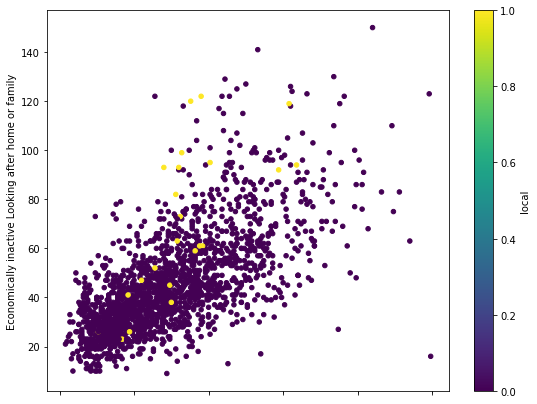

In [33]:
stat = 'Economically inactive Long-term sick or disabled'
stat2 = 'Economically inactive Looking after home or family'
data = lsoa_data
plot_two_data_sets(stat=stat,stat2=stat2,data=data,kind='scatter',figsize=(9,7))

Here we plot all the economic statistics as box plots and bar charts. Any LSOA in the local area that is in the top 1 percentile for Wales is saved in the extreme_values dictionary. 

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


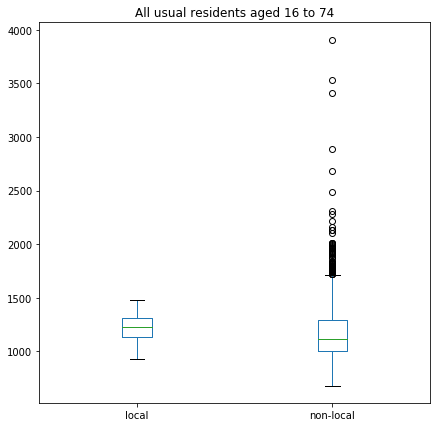

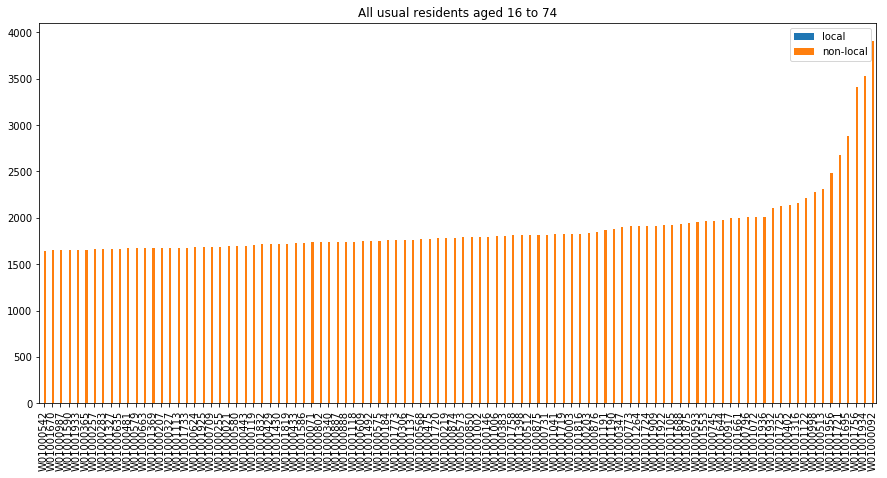

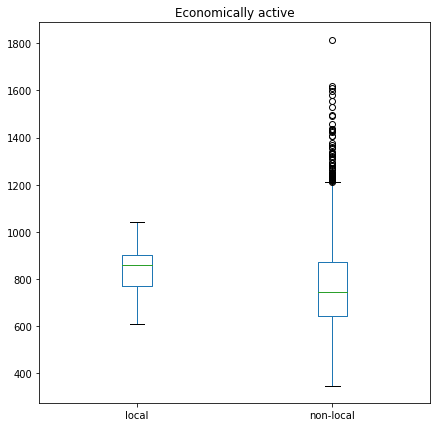

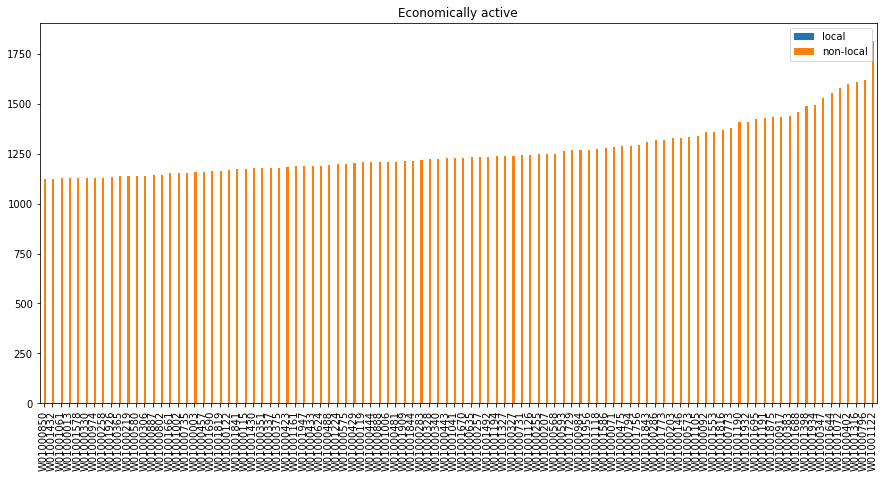

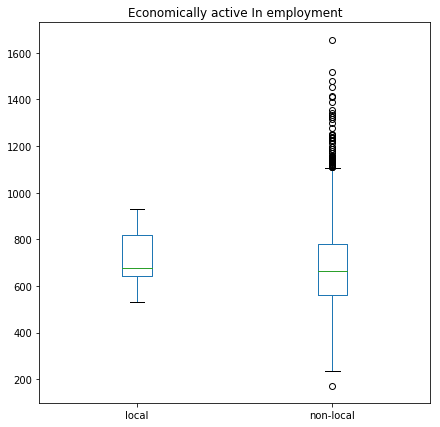

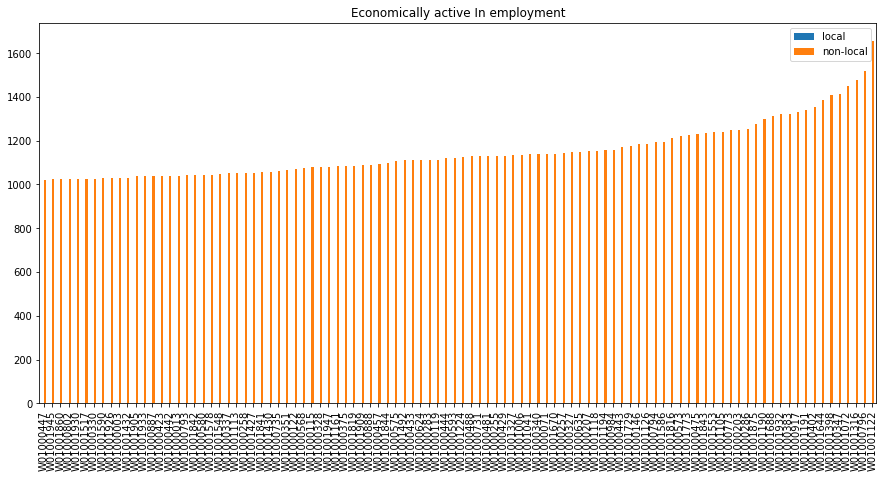

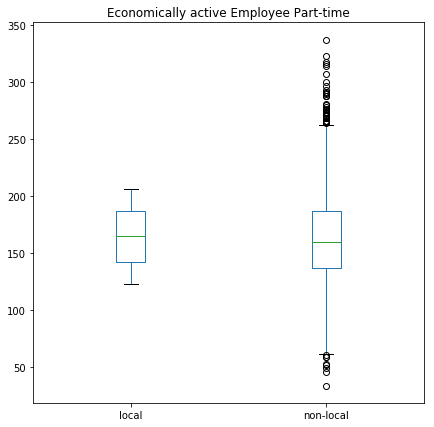

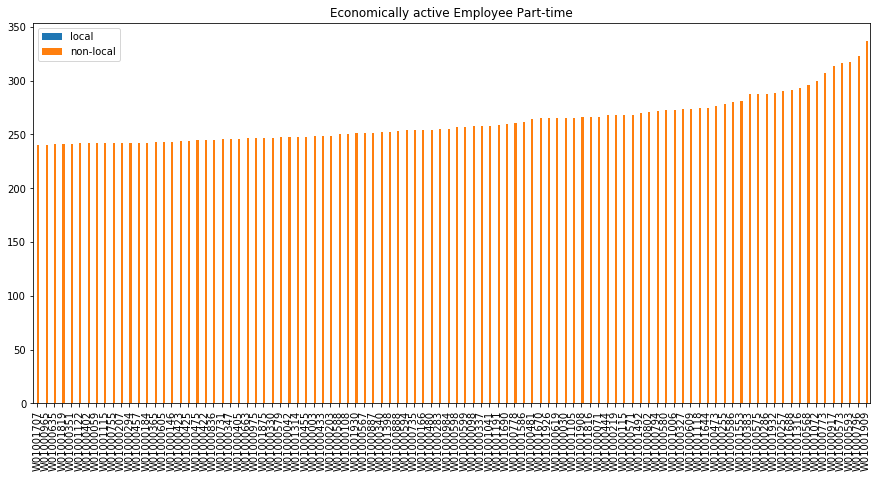

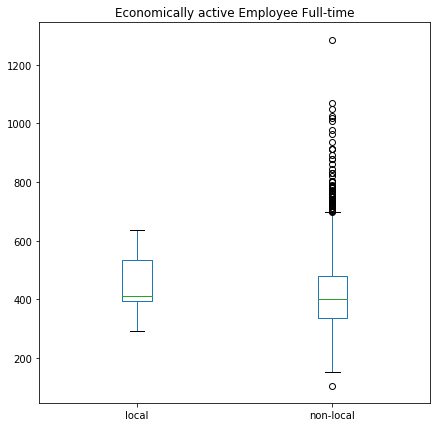

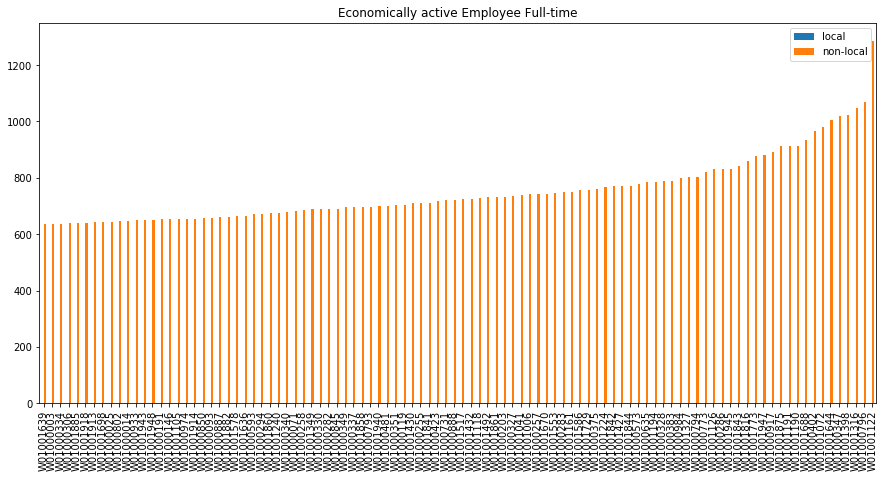

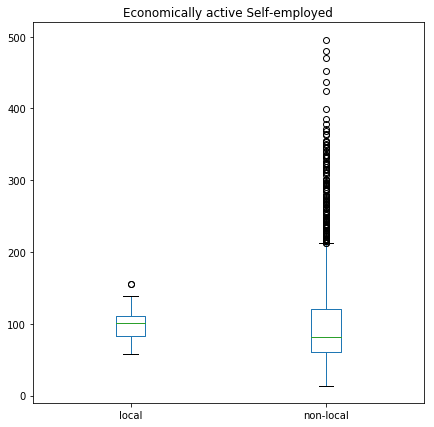

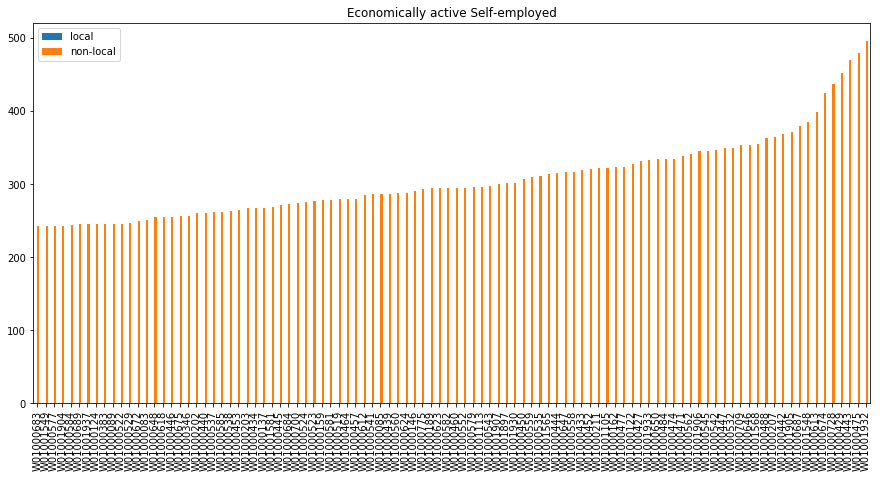

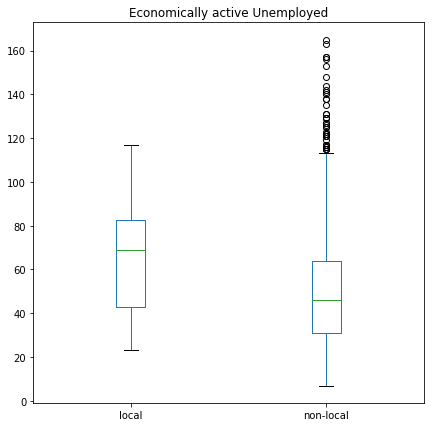

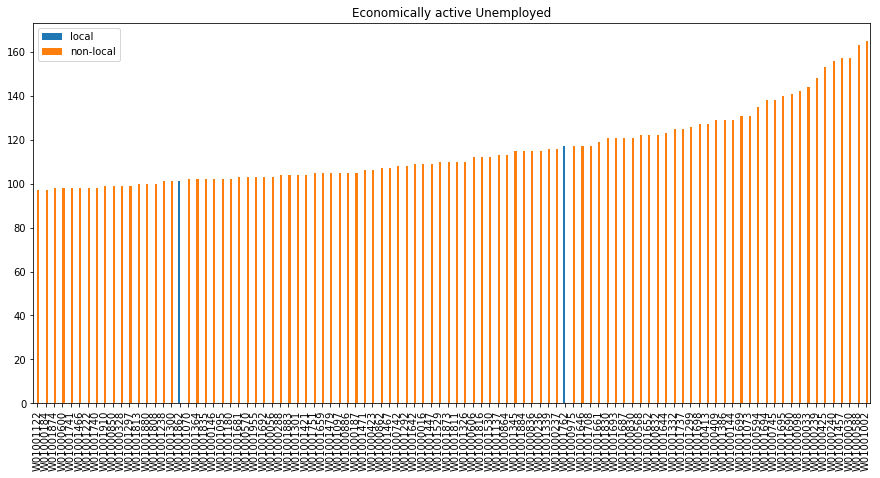

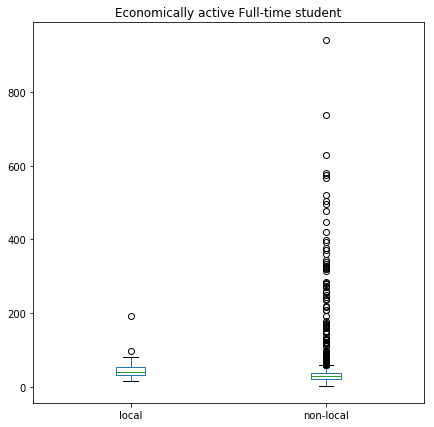

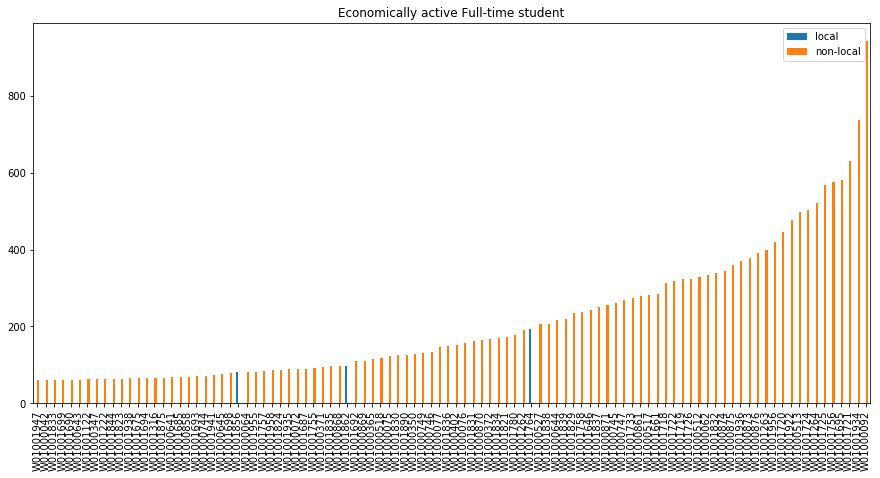

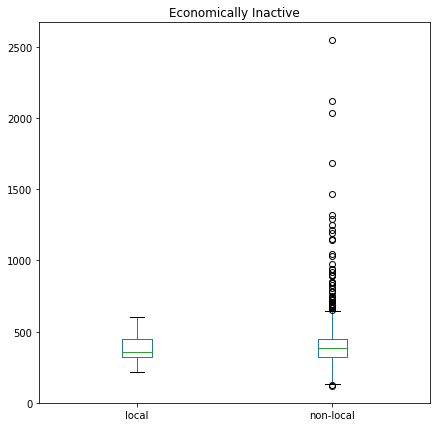

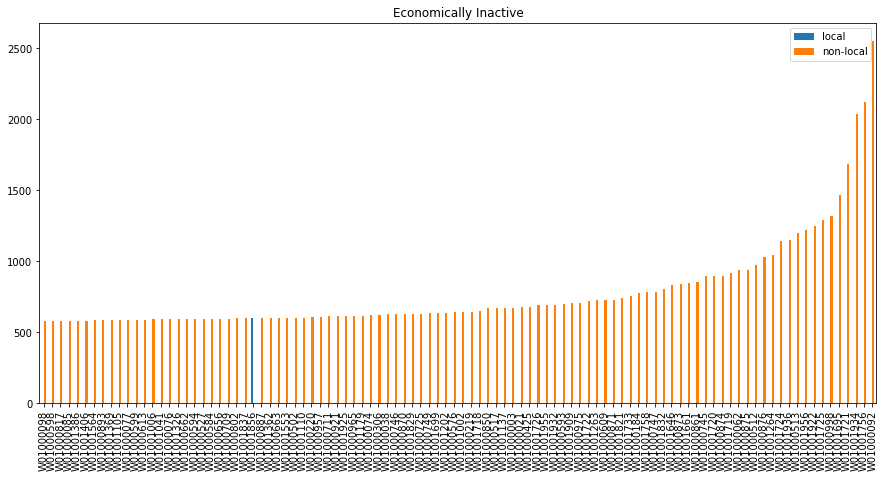

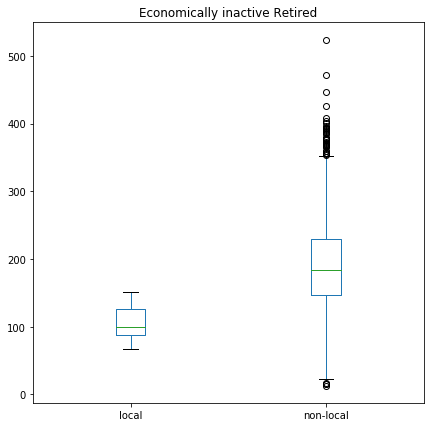

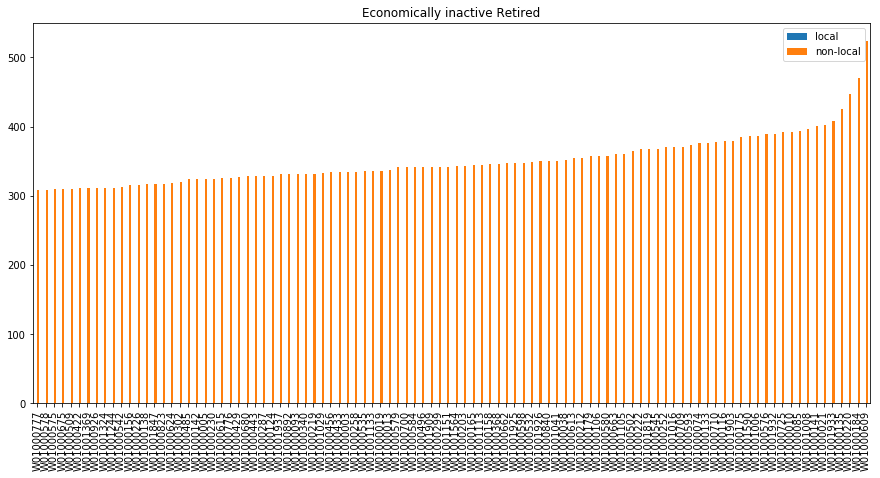

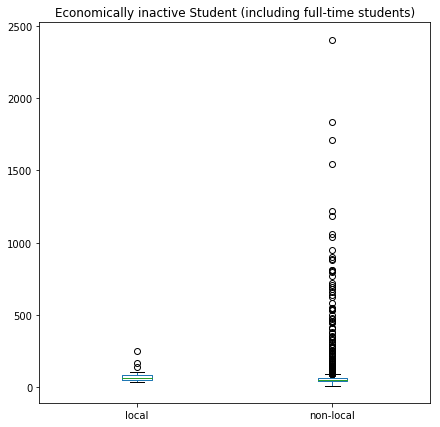

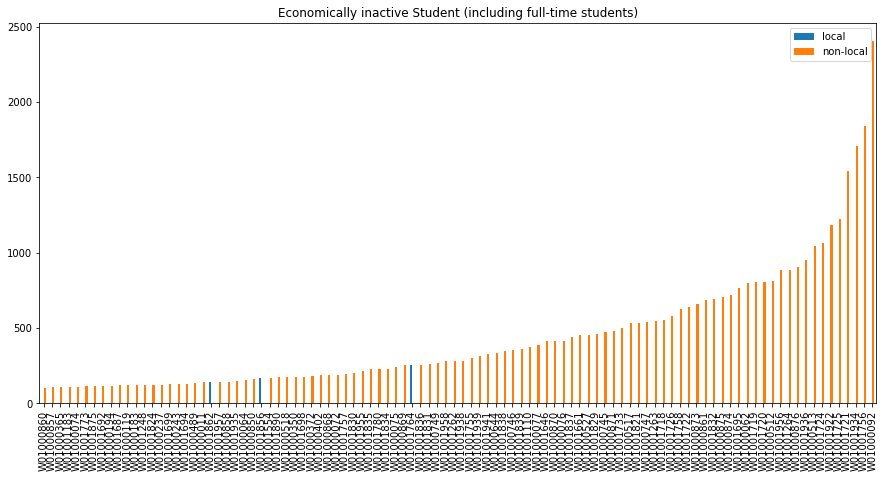

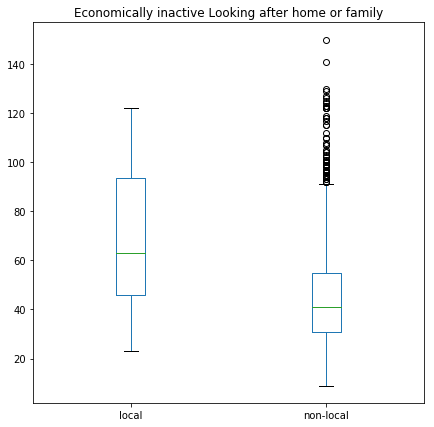

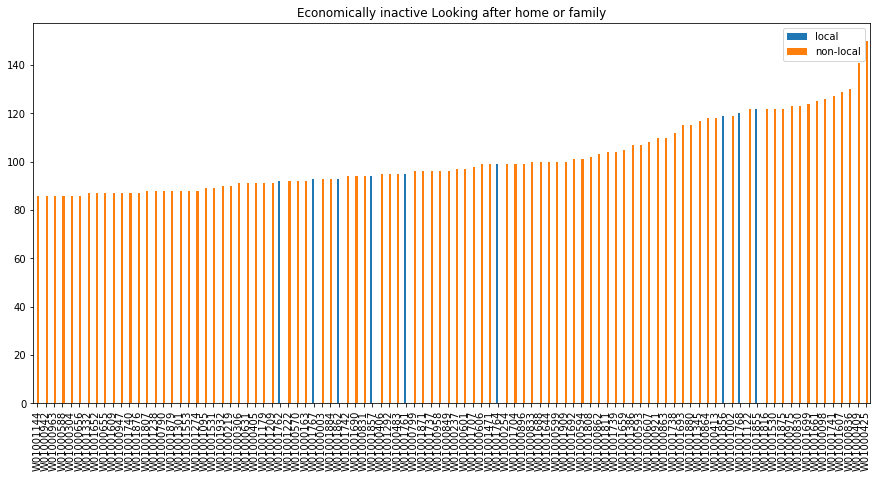

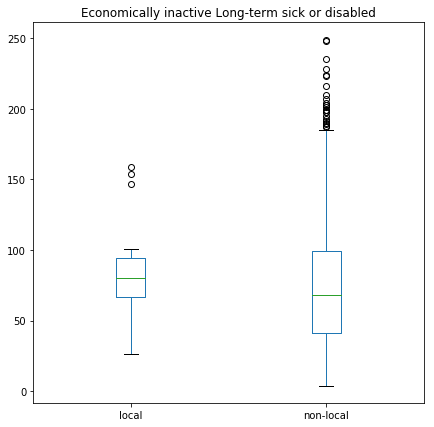

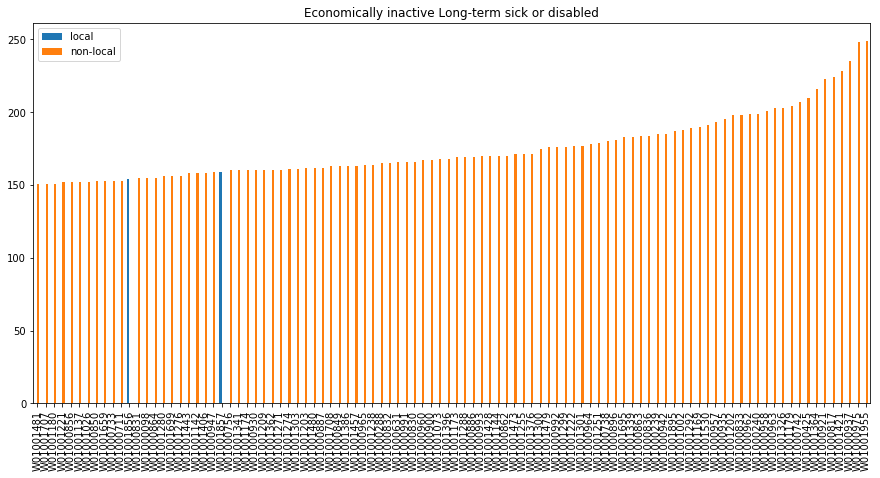

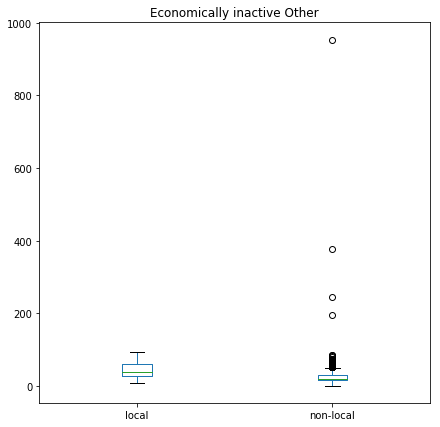

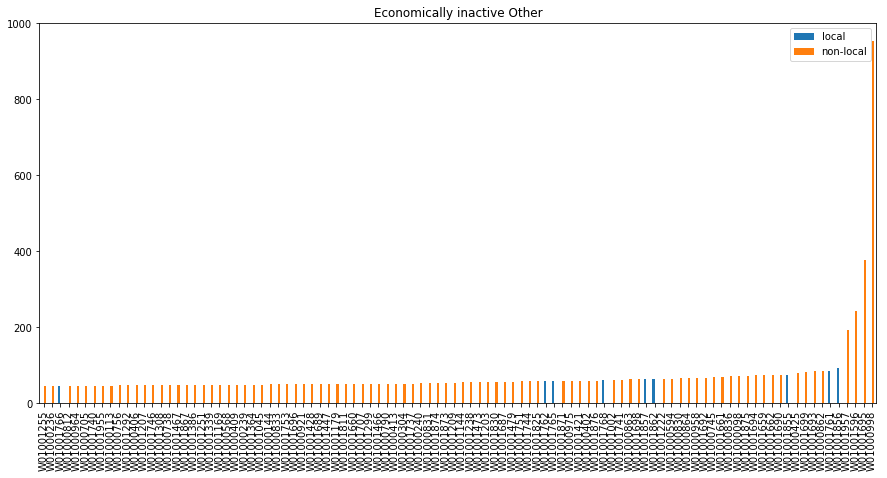

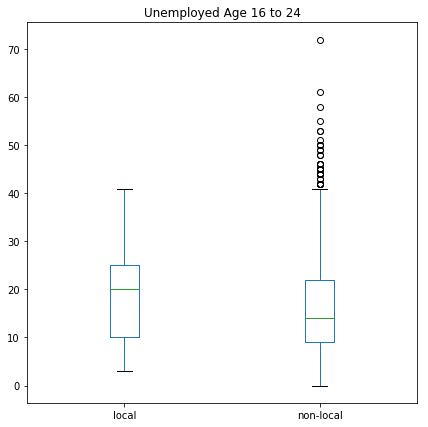

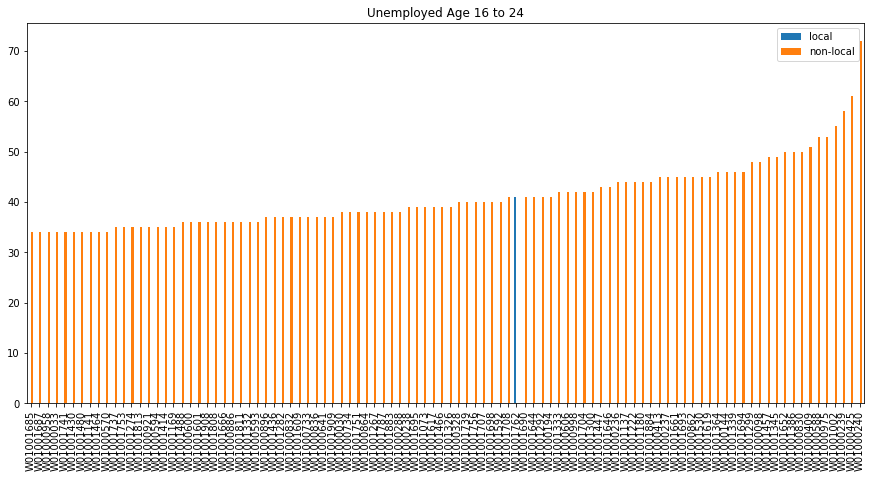

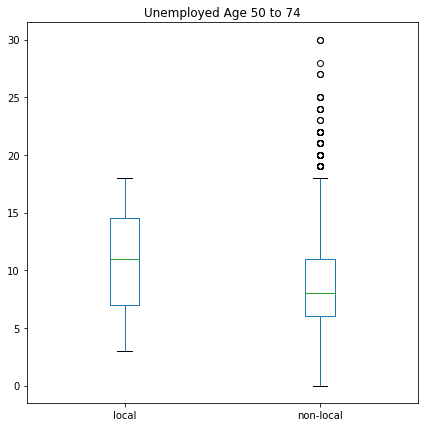

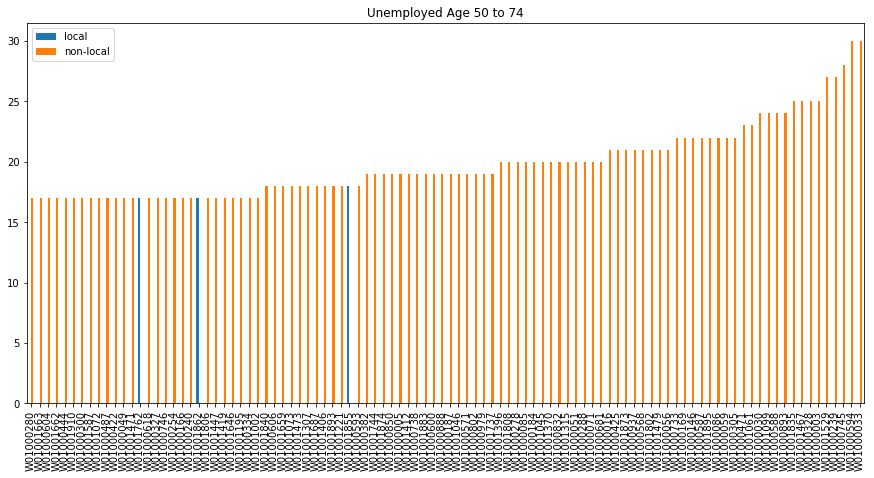

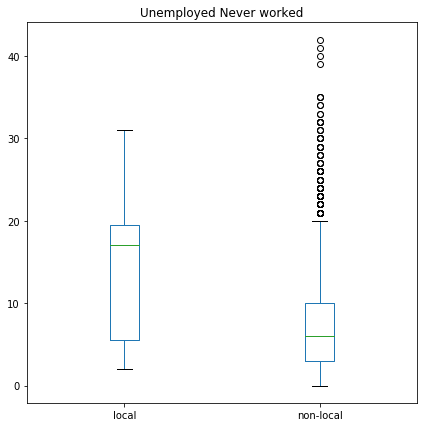

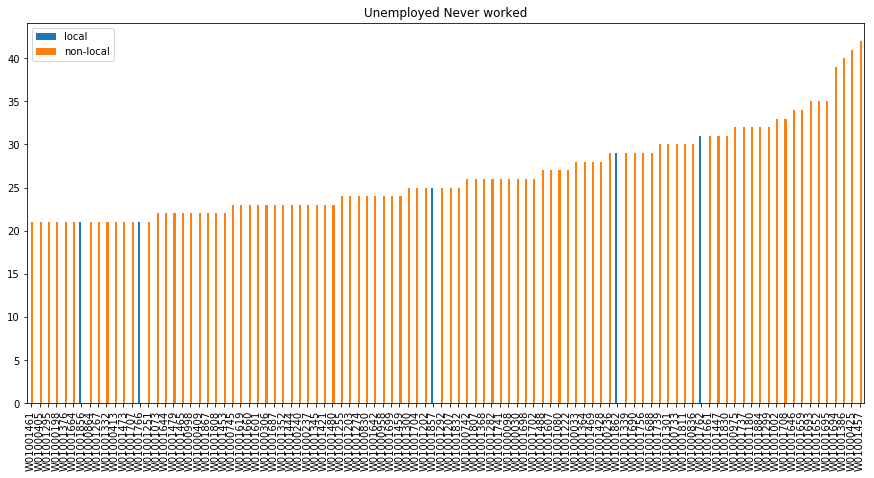

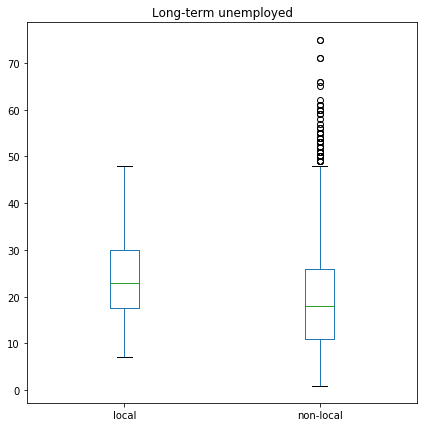

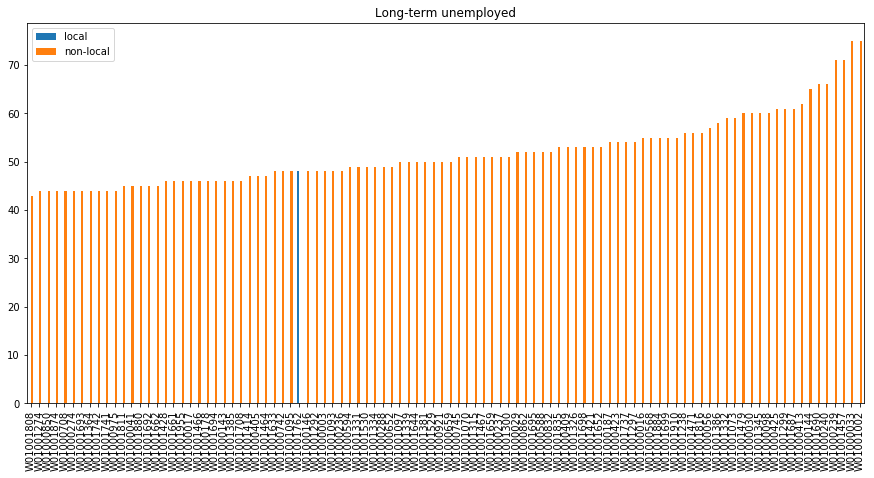

In [22]:
extreme_lsoas = {}
data = lsoa_data
for stat in local_lsoa_data.keys():
    plot_two_data_sets(stat=stat,data=data,kind='box',figsize=(7,7))
    extreme_lsoas[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar')

Below is a count of the number of times each local LSOAs that appear in the top 1 percentile for one of the statistics. I removed the number of students as this does not indicate whether an area is deprived or not. All of the remaining statistics are ones that suggest a more deprived area.

In [25]:
interesting_stat = {}
for stat in extreme_lsoas.keys():
    if extreme_lsoas[stat] != []:
        interesting_stat[stat] = extreme_lsoas[stat]
del interesting_stat['Economically active Full-time student']
del interesting_stat['Economically inactive Student (including full-time students)']

lsoa_count = {}
for stat in interesting_stat.keys():
    for lsoa in interesting_stat[stat]:
        if lsoa in lsoa_count.keys():
            lsoa_count[lsoa]+=1
        else:
            lsoa_count[lsoa] = 1
lsoa_count

{'W01001761': 2,
 'W01001762': 7,
 'W01001764': 1,
 'W01001765': 1,
 'W01001766': 2,
 'W01001767': 1,
 'W01001768': 2,
 'W01001855': 3,
 'W01001856': 5,
 'W01001857': 4,
 'W01001862': 5}

The worst local areas according to these employment measures are GRA4, and then RIV2,3, and 8. This matches nicely with what WIMD found.